In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

In [21]:
file_path = "bank.csv"
df = pd.read_csv(file_path)
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [22]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))
df.describe()

Bank marketing dataset consists of 11162 rows.


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [23]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Axes: title={'center': 'Information on Term Suscriptions'}, ylabel='count'>

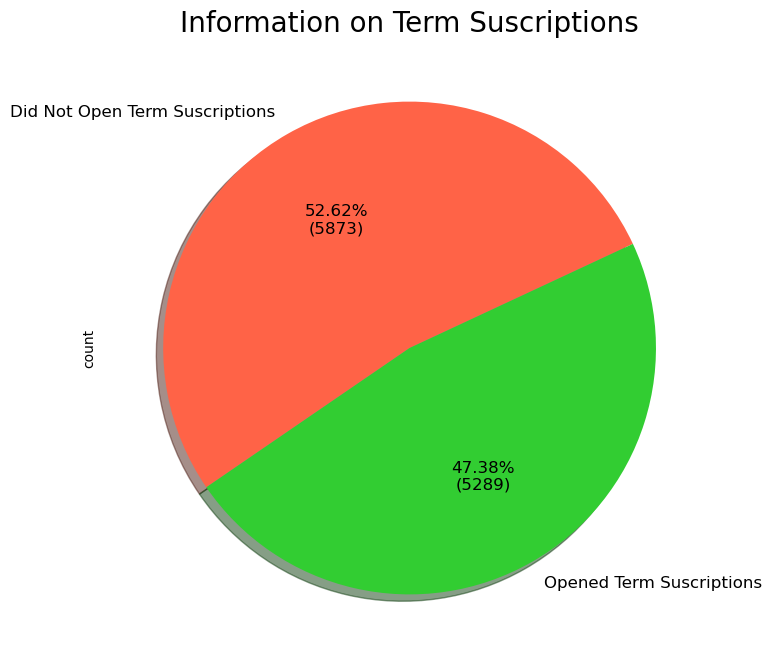

In [24]:
y_counts = df["deposit"].value_counts()
f, ax = plt.subplots(figsize=(8,8))

colors = ["tomato", "limegreen"]
labels ="Did Not Open Term Suscriptions", "Opened Term Suscriptions"

plt.title('Information on Term Suscriptions', fontsize=20)

y_counts.plot.pie(
  autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(y_counts)/100.0))),
  ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25
)

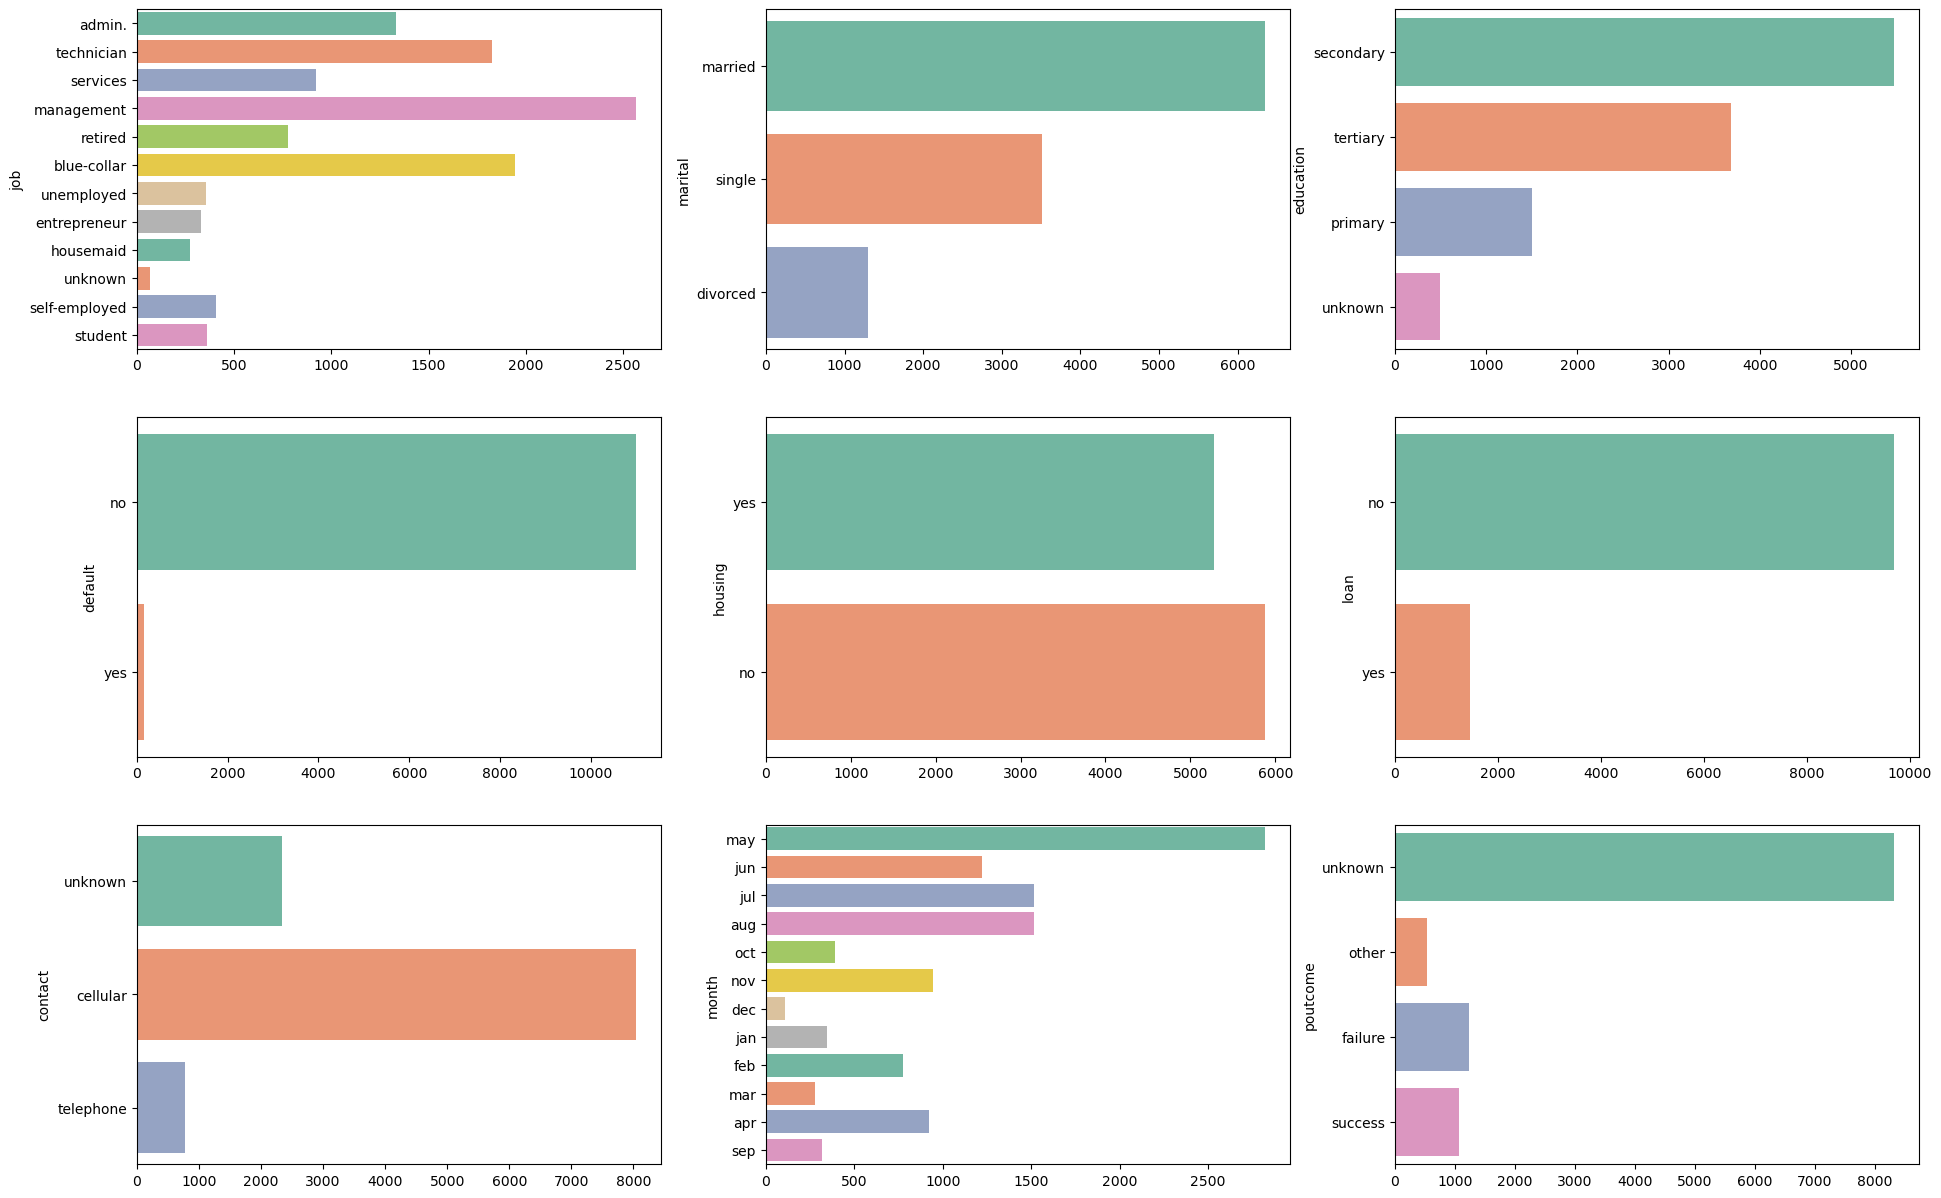

In [58]:
# Distribution Categorical Data
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns = categorical_columns.drop("deposit")

fig, ax = plt.subplots(3, 3, figsize=(23, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
  sns.countplot(y=df[variable], ax=subplot, hue=df[variable], palette="Set2", legend=False)
  subplot.set(xlabel=None)
    


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

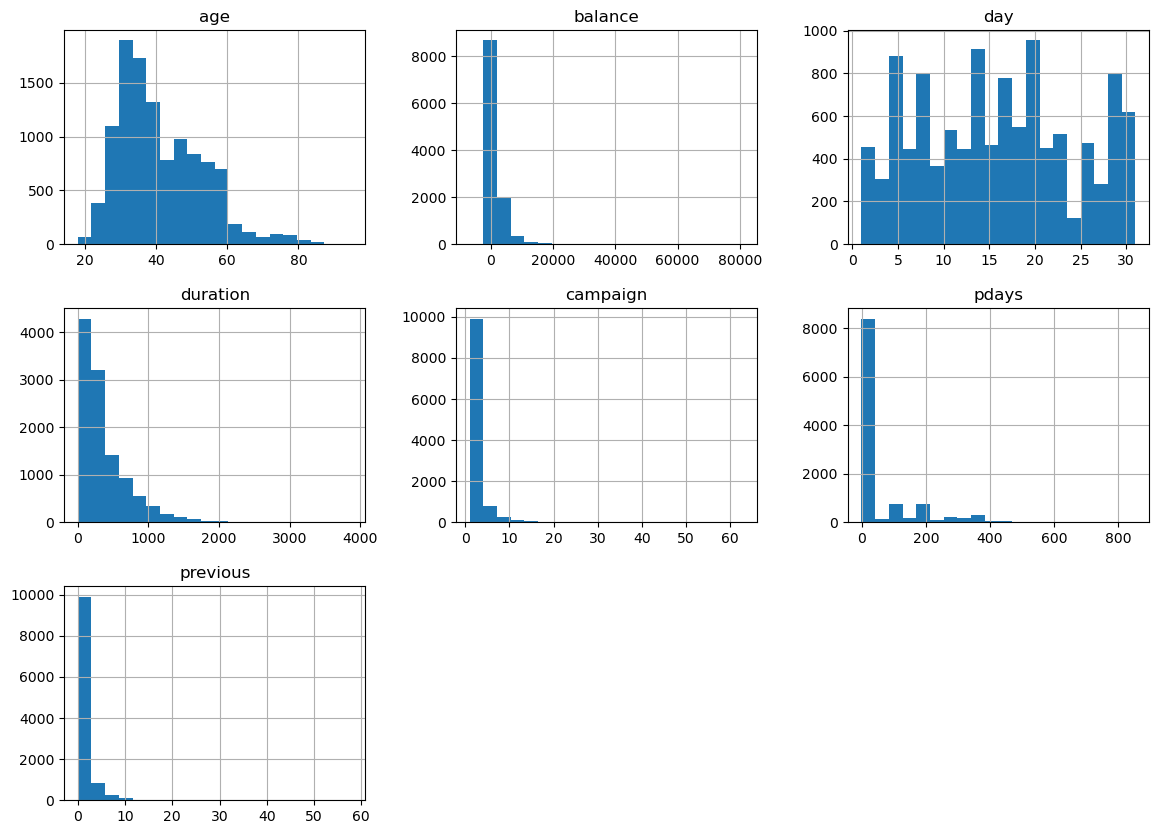

In [26]:
# Distribution Numerical Data
df.hist(bins=20, figsize=(14,10))

Text(0.5, 1.0, 'Number of Occupations')

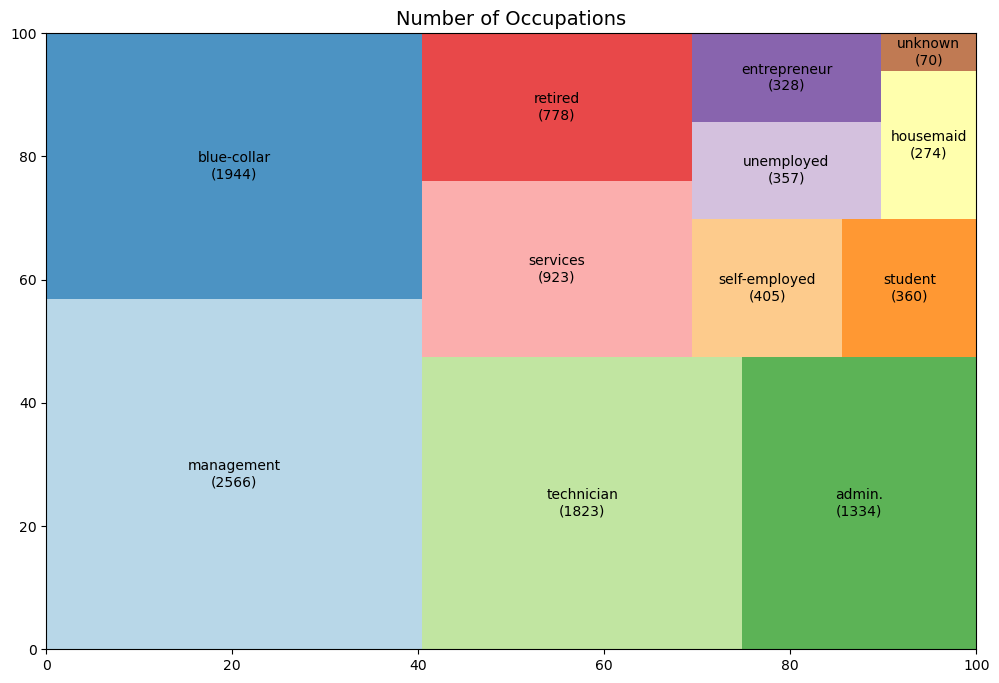

In [35]:
job_value_counts = df['job'].value_counts()
plt.figure(figsize=(12,8))
sq.plot(sizes=job_value_counts.values, alpha=.8, color=sns.color_palette("Paired", job_value_counts.size),
  label=[f"{job}\n({count})" for job, count in zip(job_value_counts.index, job_value_counts.values)], 
)
plt.title('Number of Occupations', fontsize=14)